<a href="https://colab.research.google.com/github/chanyc110/data_mining_individual_cw/blob/main/data_mining_individual_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Path to dataset in Google Drive
data_path = "/content/drive/MyDrive/data mining cw dataset/CDC Diabetes Dataset.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (253680, 22)
Columns: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Spearman Correlation with Diabetes_012:
GenHlth                 0.297138
HighBP                  0.271668
BMI                     0.235887
DiffWalk                0.223567
HighChol                0.210668
Age                     0.186357
HeartDiseaseorAttack    0.178564
Income                 -0.172611
PhysHlth                0.161718
Education              -0.126862
PhysActivity           -0.121988
Stroke                  0.105887
CholCheck               0.068018
Smoker                  0.063040
Veggies                -0.059353
HvyAlcoholConsump      -0.057244
MentHlth                0.044921
Fruits                 -0.042268
NoDocbcCost             0.037379
Sex                     0.030143
AnyHealthcare           0.014530
Name: Diabetes_012, dtype: float64


/tmp/ipython-input-2744588065.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




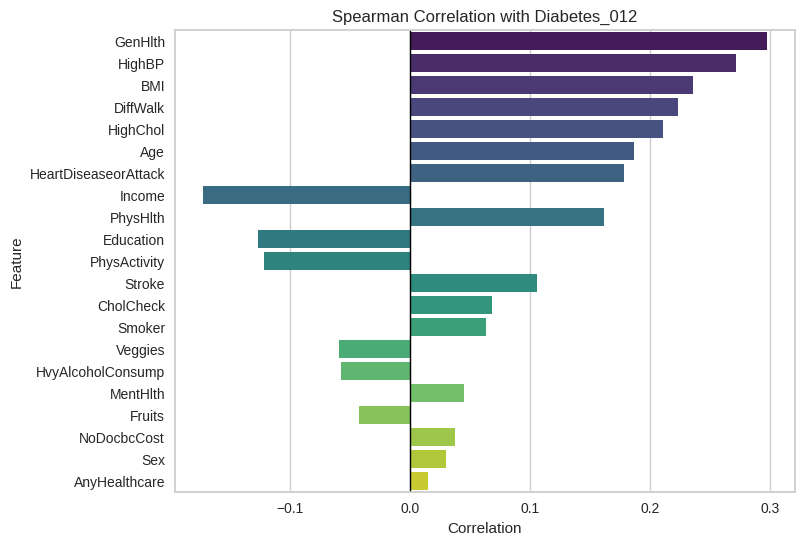

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_correlation = df.copy()

# -------------------------------
# Ensure target is numeric
# -------------------------------
df_correlation["Diabetes_012"] = pd.to_numeric(df["Diabetes_012"], errors="coerce")

# -------------------------------
# Compute Spearman correlation
# -------------------------------
corr_target = (
    df.corr(method="spearman")["Diabetes_012"]
    .drop("Diabetes_012")
    .sort_values(key=abs, ascending=False)
)

print("Spearman Correlation with Diabetes_012:")
print(corr_target)

# -------------------------------
# Visualise correlations
# -------------------------------
plt.figure(figsize=(8,6))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    palette="viridis"
)
plt.title("Spearman Correlation with Diabetes_012")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.axvline(0, color="black", linewidth=1)
plt.show()

In [ ]:
df.nunique().sort_values()


,0
HighBP,2
HighChol,2
CholCheck,2
Smoker,2
HeartDiseaseorAttack,2
Stroke,2
Fruits,2
PhysActivity,2
AnyHealthcare,2
NoDocbcCost,2


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df_correlation.drop(columns=["Diabetes_012"])

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))


                 Feature        VIF
19             Education  29.507416
2              CholCheck  23.187436
11         AnyHealthcare  20.839710
3                    BMI  18.149913
20                Income  14.156118
13               GenHlth  10.740162
18                   Age   9.886830
9                Veggies   5.826886
7           PhysActivity   4.645314
8                 Fruits   3.032775
0                 HighBP   2.299761
1               HighChol   2.029660
15              PhysHlth   1.999556
4                 Smoker   1.933042
17                   Sex   1.910708
16              DiffWalk   1.838551
14              MentHlth   1.463103
6   HeartDiseaseorAttack   1.289820
12           NoDocbcCost   1.215834
5                 Stroke   1.126777
10     HvyAlcoholConsump   1.083523


In [ ]:
# 2) check for missing values

df.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
df.duplicated().sum()

np.int64(23899)

In [ ]:
# Remove Duplicates
initial_rows = len(df)
df = df.drop_duplicates()
print(f"\nRemoved {initial_rows - len(df)} duplicate rows. New row count: {len(df)}")


Removed 23899 duplicate rows. New row count: 229781


In [ ]:
#  Validate Data Types
# Define expected data types based on column descriptions
categorical_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
ordinal_cols = ['GenHlth', 'Age', 'Education', 'Income']
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']
target_col = ['Diabetes_012']

# Convert categorical columns to boolean or category
for col in categorical_cols:
    if df[col].nunique() == 2:  # Binary columns
        df[col] = df[col].astype(bool)
    else:
        df[col] = df[col].astype('category')

# Convert ordinal columns to ordered categorical
df['GenHlth'] = pd.Categorical(df['GenHlth'], ordered=True)
df['Age'] = pd.Categorical(df['Age'], ordered=True)
df['Education'] = pd.Categorical(df['Education'], ordered=True)
df['Income'] = pd.Categorical(df['Income'], ordered=True)

# Ensure numerical columns are float
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().any():
        print(f"Warning: Non-numeric values found in {col}. Investigate.")

# Ensure target variable (Diabetes_012) is categorical
df['Diabetes_012'] = df['Diabetes_012'].astype('category')

/tmp/ipython-input-3198938056.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3198938056.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3198938056.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_012          229781 non-null  category
 1   HighBP                229781 non-null  bool    
 2   HighChol              229781 non-null  bool    
 3   CholCheck             229781 non-null  bool    
 4   BMI                   229781 non-null  float64 
 5   Smoker                229781 non-null  bool    
 6   Stroke                229781 non-null  bool    
 7   HeartDiseaseorAttack  229781 non-null  bool    
 8   PhysActivity          229781 non-null  bool    
 9   Fruits                229781 non-null  bool    
 10  Veggies               229781 non-null  bool    
 11  HvyAlcoholConsump     229781 non-null  bool    
 12  AnyHealthcare         229781 non-null  bool    
 13  NoDocbcCost           229781 non-null  bool    
 14  GenHlth               229781 non-null  ca

In [ ]:
# 3) Target distribution (3 classes)
target_col = "Diabetes_012"
class_counts = df[target_col].value_counts().sort_index()
class_percent = (class_counts / class_counts.sum() * 100).round(2)

dist_table = pd.DataFrame({
    "count": class_counts,
    "percent": class_percent
})

print("\nTarget class distribution (Diabetes_012):")
print(dist_table)


Target class distribution (Diabetes_012):
               count  percent
Diabetes_012                 
0.0           190055    82.71
1.0             4629     2.01
2.0            35097    15.27


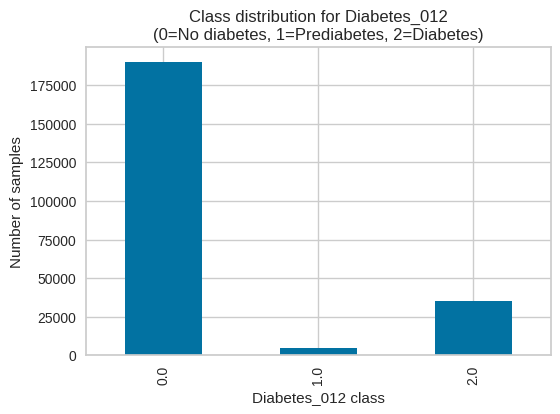

In [ ]:
# 4) Visualise imbalance
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar")
plt.xlabel("Diabetes_012 class")
plt.ylabel("Number of samples")
plt.title("Class distribution for Diabetes_012\n(0=No diabetes, 1=Prediabetes, 2=Diabetes)")
plt.show()

In [ ]:
#  Check for Outliers in Numerical Columns
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [ ]:
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        print(f"Outliers detected in {col}: {len(outliers)} rows")
        # Optionally cap outliers (commented out to preserve data; adjust as needed)
        # df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

Outliers detected in BMI: 5638 rows
Outliers detected in MentHlth: 36163 rows
Outliers detected in PhysHlth: 34347 rows


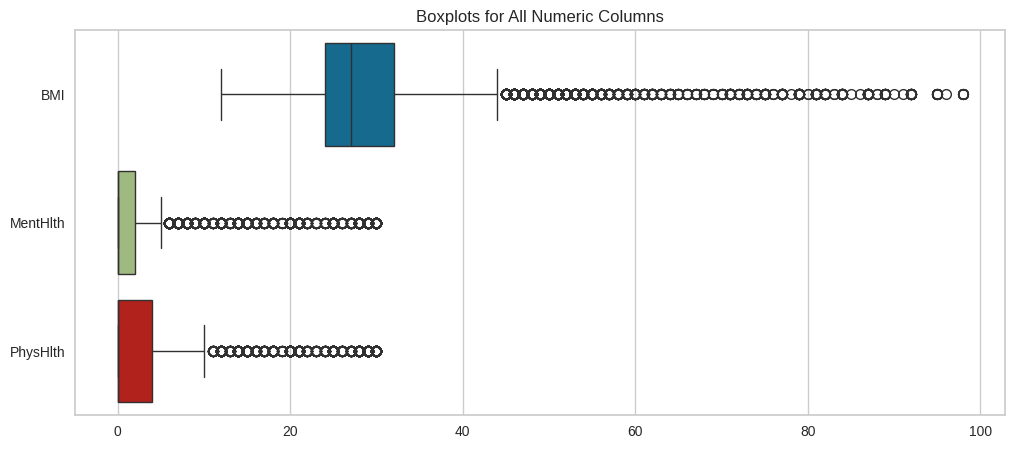

In [ ]:
import seaborn as sns


# To see outliers in numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

plt.figure(figsize=(12, 5))
sns.boxplot(data=df[numerical_cols], orient='h')
plt.title('Boxplots for All Numeric Columns')
plt.show()

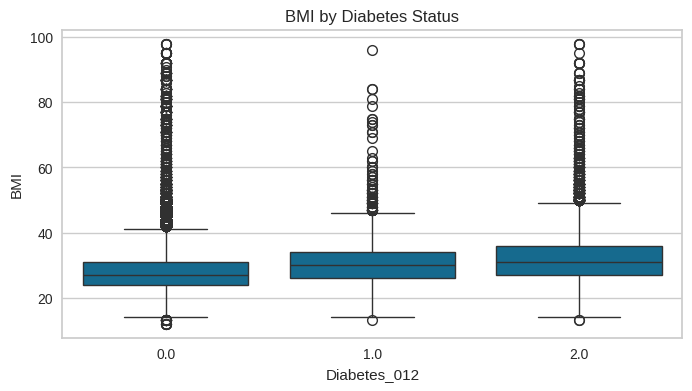

In [ ]:
# To drill down 'BMI' column, visualize grouped by target, Diabetes vs BMI
plt.figure(figsize=(8, 4))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('BMI by Diabetes Status')
plt.show()

remove outliers


In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only rows within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]#---> indentation is important!

In [ ]:
# Handle Newly Introduced Missing Values
if df.isnull().any().any():
    print("Missing values introduced during cleaning. Summary:")
    print(df.isnull().sum())
    # Impute numerical columns with median (robust to outliers)
    for col in numerical_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].median(), inplace=True)

# Classification


XG Boost,
SVM,
Logistic regression
LightGBM

remember need
 1. hyperparameter tuning
 2. probabilistic classification
 3. cross-fold validation training, prevent overfitting
 4. Address class imbalance when training model

## Preprocessing for classification




In [ ]:
# ============================================================
# REMOVE UNWANTED COLUMNS
# ============================================================

cols_to_drop = ["Education", "Fruits", "Veggies", "AnyHealthcare", "NoDocbcCost", "Sex", "HvyAlcoholConsump"]

print("Columns before removal:", df.columns.tolist())

# Drop safely (errors='ignore' avoids crashes if column missing)
df = df.drop(columns=cols_to_drop, errors='ignore')

print("\nColumns after removal:", df.columns.tolist())
print("\nRemoved columns:", cols_to_drop)
print("\nNew dataframe shape:", df.shape)


Columns before removal: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Columns after removal: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']

Removed columns: ['Education', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'Sex', 'HvyAlcoholConsump']

New dataframe shape: (161100, 15)


In [ ]:
# -----------------------------
# 1) Define X (features) and y (target)
# -----------------------------

target_col = "Diabetes_012"

# X = all features except target
X = df.drop(columns=[target_col]).copy()

# y = target column
y = df[target_col].copy()

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Show class distribution again for consistency
print("\nTarget class distribution:")
display(y.value_counts().sort_index())


Feature matrix shape: (161100, 14)
Target vector shape: (161100,)

Target class distribution:


,count
Diabetes_012,
0.0,138131
1.0,2870
2.0,20099


In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
TEST_SIZE = 0.2   # You can change this later if needed

# -----------------------------
# 2) Stratified Train-test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

# Class distribution before/after split
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

split_df = pd.DataFrame({
    "Dataset": ["Training Set", "Test Set"],
    "Samples": [f"{len(X_train):,}", f"{len(X_test):,}"],
    "Class 0 (No Diabetes)": [
        f"{train_counts[0]:,} ({train_counts[0] / len(y_train) * 100:.1f}%)",
        f"{test_counts[0]:,} ({test_counts[0] / len(y_test) * 100:.1f}%)"
    ],
    "Class 1 (Prediabetes)": [
        f"{train_counts[1]:,} ({train_counts[1] / len(y_train) * 100:.1f}%)",
        f"{test_counts[1]:,} ({test_counts[1] / len(y_test) * 100:.1f}%)"
    ],
    "Class 2 (Diabetes)": [
        f"{train_counts[2]:,} ({train_counts[2] / len(y_train) * 100:.1f}%)",
        f"{test_counts[2]:,} ({test_counts[2] / len(y_test) * 100:.1f}%)"
    ],
})

print("\nStratified Train–Test Split Summary:")
display(split_df)



Stratified Train–Test Split Summary:


,Dataset,Samples,Class 0 (No Diabetes),Class 1 (Prediabetes),Class 2 (Diabetes)
0,Training Set,"128,880","110,505 (85.7%)","2,296 (1.8%)","16,079 (12.5%)"
1,Test Set,"32,220","27,626 (85.7%)",574 (1.8%),"4,020 (12.5%)"


In [ ]:
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), numerical_cols)
    ],
    remainder = 'passthrough'
)


## Model Comparison

compare 2 class imbalance handling approaches:
1. class weights
2. SMOTE


recall more important than precision here





In [ ]:
# ================================================
# OPTIONAL: Stratified Sampling to Reduce Training Size
# ================================================
from sklearn.model_selection import train_test_split

SAMPLE_SIZE = 10000   # you may change this to 5000 or 20000

# Combine X_train and y_train for sampling
train_df = X_train.copy()
train_df["target"] = y_train

# Stratified sample
train_small = train_df.groupby("target", group_keys=False).apply(
    lambda x: x.sample(
        frac=min(1, SAMPLE_SIZE / len(train_df)),
        random_state=RANDOM_STATE
    )
)

print(f"Sampled training size: {len(train_small):,}")

# Split back into X_train_small, y_train_small
y_train_small = train_small["target"]
X_train_small = train_small.drop(columns=["target"])

print("X_train_small shape:", X_train_small.shape)
print("y_train_small distribution:")
display(y_train_small.value_counts())


Sampled training size: 10,000
X_train_small shape: (10000, 14)
y_train_small distribution:


/tmp/ipython-input-1097726757.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-1097726757.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,count
target,
0.0,8574
2.0,1248
1.0,178


In [ ]:
# =============================================================
# CLASSIFICATION WITH CLASS WEIGHTS
# =============================================================

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight

from joblib import Parallel, delayed
import numpy as np


# -------------------------------------------------------------
# Define models WITH class weights
# -------------------------------------------------------------
models_weighted = {
    "Logistic Regression": LogisticRegression(
        multi_class="multinomial",
        class_weight='balanced',
        max_iter=2000,
        random_state=RANDOM_STATE
    ),

    "SVM (SVC)": SVC(
        kernel="rbf",
        class_weight='balanced',
        probability=True,
        random_state=RANDOM_STATE
    ),

    "XGBoost": XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        eval_metric="mlogloss",
        random_state=RANDOM_STATE,
        verbosity=0
        # multiclass XGBoost ignores scale_pos_weight, so we skip it
    ),

    "LightGBM": LGBMClassifier(
        objective="multiclass",
        num_class=3,
        class_weight='balanced',    # <--- class imbalance handled here
        random_state=RANDOM_STATE,
        boosting_type="gbdt",
        n_estimators=300,
        learning_rate=0.05
    )
}

def train_model_weighted(name, model, X_train_small, y_train_small, preprocessor, cv_folds=5):

    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)

    scoring = {
        "accuracy": "accuracy",
        "precision_macro": "precision_macro",
        "recall_macro": "recall_macro",
        "f1_macro": "f1_macro",
        "precision_weighted": "precision_weighted",
        "recall_weighted": "recall_weighted",
        "f1_weighted": "f1_weighted"
    }

    # Collect CV scores manually because XGBoost needs sample_weight injected
    results = {k: [] for k in scoring.keys()}

    for train_idx, val_idx in cv.split(X_train_small, y_train_small):

        Xtr, Xval = X_train_small.iloc[train_idx], X_train_small.iloc[val_idx]
        ytr, yval = y_train_small.iloc[train_idx], y_train_small.iloc[val_idx]

        # Compute sample weights (balanced) for XGBoost
        sample_w = compute_sample_weight("balanced", ytr)

        # Build fresh pipeline
        pipeline = Pipeline([
            ("preprocess", preprocessor),
            ("model", model)
        ])

        # -----------------------------
        # Apply class imbalance handling
        # -----------------------------
        if name == "XGBoost":
            # XGBoost uses sample weights
            pipeline.fit(Xtr, ytr, model__sample_weight=sample_w)
        else:

            pipeline.fit(Xtr, ytr)

        # Predict
        ypred = pipeline.predict(Xval)

        # Compute metrics
        for metric_name, scorer in scoring.items():
            from sklearn.metrics import get_scorer
            results[metric_name].append(get_scorer(scorer)(pipeline, Xval, yval))

    # Average scores across folds
    return {
        "Model": name,
        "Accuracy": np.mean(results["accuracy"]),
        "Precision Macro": np.mean(results["precision_macro"]),
        "Recall Macro": np.mean(results["recall_macro"]),
        "F1 Macro": np.mean(results["f1_macro"]),
        "Precision Weighted": np.mean(results["precision_weighted"]),
        "Recall Weighted": np.mean(results["recall_weighted"]),
        "F1 Weighted": np.mean(results["f1_weighted"]),
    }

# -------------------------------------------------------------
# TRAIN MODELS (CLASS WEIGHTS)
# -------------------------------------------------------------
print("\nTraining models using CLASS WEIGHTS...")
results_weights = Parallel(n_jobs=-1, verbose=1)(
    delayed(train_model_weighted)(name, model, X_train_small, y_train_small, preprocessor)
    for name, model in models_weighted.items()
)

results_weights_df = pd.DataFrame(results_weights)
print("\n=== Cross-Validation Results (Class Weights) ===")
display(results_weights_df)



Training models using CLASS WEIGHTS...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



=== Cross-Validation Results (Class Weights) ===


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.6min finished


,Model,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
0,Logistic Regression,0.6057,0.424594,0.518011,0.398306,0.852439,0.6057,0.688023
1,SVM (SVC),0.5764,0.419553,0.499291,0.383228,0.855051,0.5764,0.662970
2,XGBoost,0.7304,0.398556,0.435410,0.403096,0.814930,0.7304,0.764017
3,LightGBM,0.7133,0.405266,0.460354,0.409058,0.823839,0.7133,0.753765


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply preprocessing first
Xtr_processed = preprocessor.fit_transform(X_train_small)

# Apply SMOTE directly
sm = SMOTE(random_state=RANDOM_STATE)
X_resampled, y_resampled = sm.fit_resample(Xtr_processed, y_train_small)

print("\nBefore SMOTE:", Counter(y_train_small))
print("After SMOTE: ", Counter(y_resampled))



Before SMOTE: Counter({0.0: 8574, 2.0: 1248, 1.0: 178})
After SMOTE:  Counter({0.0: 8574, 1.0: 8574, 2.0: 8574})


In [ ]:
# =============================================================
# CLASSIFICATION WITH SMOTE OVERSAMPLING
# =============================================================

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline

# -------------------------------------------------------------
# Define models WITHOUT class weights (SMOTE handles imbalance)
# -------------------------------------------------------------
models_smote = {
    "Logistic Regression (SMOTE)": LogisticRegression(
        multi_class="multinomial",
        max_iter=2000,
        random_state=RANDOM_STATE
    ),

    "SVM (SMOTE)": SVC(
        kernel="rbf",
        probability=True,
        random_state=RANDOM_STATE
    ),

    "XGBoost (SMOTE)": XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        eval_metric="mlogloss",
        random_state=RANDOM_STATE,
        verbosity=0
    ),

    "LightGBM (SMOTE)": LGBMClassifier(
        objective="multiclass",
        num_class=3,
        random_state=RANDOM_STATE,
        boosting_type="gbdt",
        n_estimators=300,
        learning_rate=0.05
    )
}

# -------------------------------------------------------------
# Helper function for SMOTE CV
# -------------------------------------------------------------
def train_model_smote(name, model, X_train_small, y_train_small, preprocessor, cv_folds=5):
    pipeline = IMBPipeline([
        ("preprocess", preprocessor),
        ("smote", SMOTE( random_state=RANDOM_STATE)),
        ("model", model)
    ])

    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=RANDOM_STATE)

    scoring = {
      "accuracy": "accuracy",
      "precision_macro": "precision_macro",
      "recall_macro": "recall_macro",
      "f1_macro": "f1_macro",
      "precision_weighted": "precision_weighted",
      "recall_weighted": "recall_weighted",
      "f1_weighted": "f1_weighted"
  }

    scores = cross_validate(pipeline, X_train_small, y_train_small,
                            cv=cv, scoring=scoring, n_jobs=1)

    return {
      "Model": name,
      "Accuracy": scores["test_accuracy"].mean(),
      "Precision Macro": scores["test_precision_macro"].mean(),
      "Recall Macro": scores["test_recall_macro"].mean(),
      "F1 Macro": scores["test_f1_macro"].mean(),
      "Precision Weighted": scores["test_precision_weighted"].mean(),
      "Recall Weighted": scores["test_recall_weighted"].mean(),
      "F1 Weighted": scores["test_f1_weighted"].mean()
}

# -------------------------------------------------------------
# TRAIN MODELS (SMOTE)
# -------------------------------------------------------------
print("\nTraining models using SMOTE oversampling...")
results_smote = Parallel(n_jobs=-1, verbose=1)(
    delayed(train_model_smote)(name, model, X_train_small, y_train_small, preprocessor)
    for name, model in models_smote.items()
)

results_smote_df = pd.DataFrame(results_smote)
print("\n=== Cross-Validation Results (SMOTE) ===")
display(results_smote_df)



Training models using SMOTE oversampling...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



=== Cross-Validation Results (SMOTE) ===


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 14.5min finished


,Model,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
0,Logistic Regression (SMOTE),0.6018,0.423988,0.502651,0.395225,0.852635,0.6018,0.686456
1,SVM (SMOTE),0.5836,0.418630,0.490059,0.384970,0.851696,0.5836,0.669260
2,XGBoost (SMOTE),0.8417,0.433233,0.385237,0.393717,0.799036,0.8417,0.815280
3,LightGBM (SMOTE),0.8461,0.447174,0.389682,0.399224,0.803550,0.8461,0.819153


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cw = results_weights_df
sm = results_smote_df

# Create a 2x3 subplot
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[
        "F1 Macro", "Precision Macro", "Recall Macro",
        "F1 Weighted", "Precision Weighted", "Recall Weighted"
    ]
)

# ===== Helper Function to Add Bars =====
def add_bars(row, col, metric_name, show_legend=False):
    # Class Weights
    fig.add_trace(
        go.Bar(
            name="Class Weights",
            x=cw["Model"],
            y=cw[metric_name],
            marker_color="#66c2a5",
            text=cw[metric_name].round(3),
            textposition="outside",
            showlegend=show_legend
        ),
        row=row, col=col
    )

    # SMOTE
    fig.add_trace(
        go.Bar(
            name="SMOTE",
            x=sm["Model"],
            y=sm[metric_name],
            marker_color="#fc8d62",
            text=sm[metric_name].round(3),
            textposition="outside",
            showlegend=show_legend
        ),
        row=row, col=col
    )

# ===== Add Metrics to Subplots =====
add_bars(1, 1, "F1 Macro", show_legend = True)
add_bars(1, 2, "Precision Macro", show_legend = False)
add_bars(1, 3, "Recall Macro", show_legend = False)

add_bars(2, 1, "F1 Weighted", show_legend = False)
add_bars(2, 2, "Precision Weighted", show_legend = False)
add_bars(2, 3, "Recall Weighted", show_legend = False)

# ===== Layout =====
fig.update_layout(
    title=(
        "Model Comparison: Class Weights vs SMOTE<br>"
        "<sup>Evaluating Performance Across Precision, Recall, and F1</sup>"
    ),
    barmode="group",
    height=900,
)

# Rotate labels
fig.update_xaxes(tickangle=45)

# Consistent y-axis range (0–1)
for r in [1, 2]:
    for c in [1, 2, 3]:
        fig.update_yaxes(range=[0, 1], row=r, col=c)

fig.show()


## Best model selection and hyperparameter tuning

Select best model based on F1 score, which is a mix of recall and precision

Also because we are predicting diabetes, recall is more important than precision so looking at the recall graph for support

In [ ]:
# =============================================================
# BEST MODEL SELECTION USING WEIGHTED F1 AND WEIGHTED RECALL
# =============================================================

# ========= WEIGHTED F1 =========
cw_best_f1 = results_weights_df["F1 Weighted"].max()
cw_best_f1_model = results_weights_df.loc[
    results_weights_df["F1 Weighted"].idxmax(), "Model"
]

sm_best_f1 = results_smote_df["F1 Weighted"].max()
sm_best_f1_model = results_smote_df.loc[
    results_smote_df["F1 Weighted"].idxmax(), "Model"
]

# Determine best approach for F1 Weighted
if sm_best_f1 > cw_best_f1:
    best_f1_approach = "SMOTE"
    best_f1_model = sm_best_f1_model
    best_f1_value = sm_best_f1
else:
    best_f1_approach = "Class Weights"
    best_f1_model = cw_best_f1_model
    best_f1_value = cw_best_f1

# ========= WEIGHTED RECALL =========
cw_best_recall = results_weights_df["Recall Weighted"].max()
cw_best_recall_model = results_weights_df.loc[
    results_weights_df["Recall Weighted"].idxmax(), "Model"
]

sm_best_recall = results_smote_df["Recall Weighted"].max()
sm_best_recall_model = results_smote_df.loc[
    results_smote_df["Recall Weighted"].idxmax(), "Model"
]

# Determine best approach for Recall Weighted
if sm_best_recall > cw_best_recall:
    best_recall_approach = "SMOTE"
    best_recall_model = sm_best_recall_model
    best_recall_value = sm_best_recall
else:
    best_recall_approach = "Class Weights"
    best_recall_model = cw_best_recall_model
    best_recall_value = cw_best_recall

# ========= DISPLAY RESULTS =========
best_results_table = {
    "Best Weighted F1 Model": best_f1_model,
    "Best Weighted F1 Approach": best_f1_approach,
    "Best Weighted F1 Score": f"{best_f1_value:.4f}",

    "Best Weighted Recall Model": best_recall_model,
    "Best Weighted Recall Approach": best_recall_approach,
    "Best Weighted Recall Score": f"{best_recall_value:.4f}"
}

# If you use create_info_table:
# create_info_table(best_results_table, title="Model Selection (Weighted Metrics)").show()

# Using dataframe display:
display(pd.DataFrame(best_results_table, index=[0]))



,Best Weighted F1 Model,Best Weighted F1 Approach,Best Weighted F1 Score,Best Weighted Recall Model,Best Weighted Recall Approach,Best Weighted Recall Score
0,LightGBM (SMOTE),SMOTE,0.8192,LightGBM (SMOTE),SMOTE,0.8461


## Hyperparameter tuning on the best model

tuning with weighted recall

Hyperparameter tuning weighted recall

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid_smote_recall = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0],
}

xgb_smote_pipeline_recall = IMBPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('classifier', XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        eval_metric='mlogloss',
        random_state=RANDOM_STATE
    ))
])

print("Performing hyperparameter tuning for XGBoost using Weighted Recall...")

grid_search_smote_recall = GridSearchCV(
    estimator=xgb_smote_pipeline_recall,
    param_grid=param_grid_smote_recall,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
    scoring='recall_weighted',    # << weighted recall
    n_jobs=-1,
    verbose=1
)

grid_search_smote_recall.fit(X_train_small, y_train_small)

best_params_smote_recall = pd.DataFrame([
    {'Parameter': k.replace('classifier__', ''), 'Value': str(v)}
    for k, v in grid_search_smote_recall.best_params_.items()
])

display(best_params_smote_recall)
print("Best Weighted Recall Score:", grid_search_smote_recall.best_score_)


Performing hyperparameter tuning for XGBoost using Weighted Recall...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


,Parameter,Value
0,learning_rate,0.01
1,max_depth,3
2,n_estimators,100
3,subsample,1.0


Best Weighted Recall Score: 0.8411000000000002


## Retrain best model with SMOTE and Hyperparameters on full dataset

retraining with recall best hyperparameters

In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# ================================================
# 1) Retrain XGBoost with Best Hyperparameters recall
# ================================================

best_params = grid_search_smote_recall.best_params_
print("Applying best XGBoost parameters:", best_params)

best_xgb_smote_pipeline = IMBPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE( random_state=RANDOM_STATE)),
    ('classifier', XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        random_state=RANDOM_STATE,
        eval_metric='mlogloss',
        **{k.replace("classifier__", ""): v for k, v in best_params.items()}
    ))
])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Training now on full dataset...")


# Train on the FULL training data, not the sampled data
best_xgb_smote_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_recall = best_xgb_smote_pipeline.predict(X_test)

# ================================================
# SHOW ACCURACY SCORE
# ================================================
accuracy = accuracy_score(y_test, y_pred_recall)
print(f"\nAccuracy on Test Set: {accuracy:.4f}\n")




Class counts in full training set: Counter({0.0: 170962, 2.0: 28277, 1.0: 3705})
Desired_n for SMOTE: 59836
Applying best XGBoost parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
X_train shape: (202944, 21)
y_train shape: (202944,)
Training now on full dataset...

Accuracy on Test Set: 0.8474



Best model : XGBoost with SMOTE and weighted recall hyperparameters

## Confusion Matrix

AFter training the best model we plot the confusion matrix, however the plot showed that the model was not making any predictions on prediabetes class. meaning that it cannot distinguish between diabetes and prediabetes , only predicting diabetes and non-diabetes(prediabtes or no diabetes). essentially the model grouped class 0 and 1 as no diabetes. to fix this i realised that my xgboost model was not handling class imabalnce. the code from earlier was not properly applying class weights to XGBoost.



SMOTE is not handling class imbalance ----

Confusion matrix for XGBoost with SMOTE

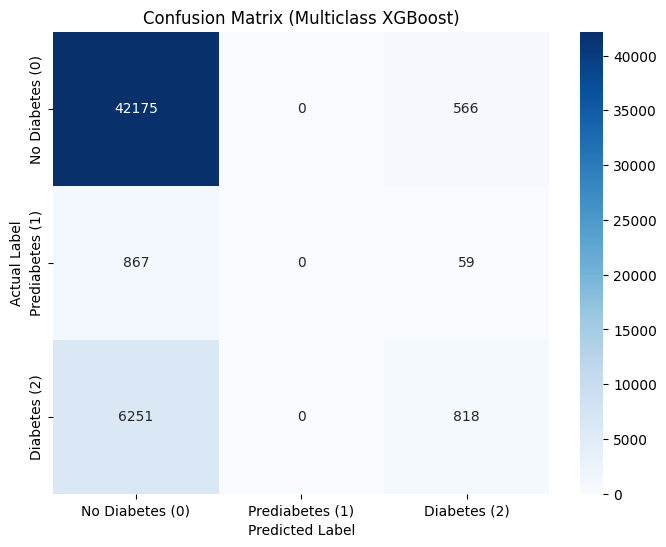

,Pred 0,Pred 1,Pred 2
Actual 0,42175,0,566
Actual 1,867,0,59
Actual 2,6251,0,818


In [ ]:
# ================================================
# CONFUSION MATRIX (MULTICLASS)
# ================================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_recall)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"],
    yticklabels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"]
)

plt.title("Confusion Matrix (Multiclass XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ================================================
# SHOW CONFUSION MATRIX TABLE
# ================================================
cm_df = pd.DataFrame(
    cm,
    columns=["Pred 0", "Pred 1", "Pred 2"],
    index=["Actual 0", "Actual 1", "Actual 2"]
)

display(cm_df)


XGBoost with SMOTE cant predict class 1

## Evaluating next best models



Try SVM with SMOTE

1. Hyperparameter tuning  
2. retrain for SVM SMOTE


i tried SVM SMOTE on full dataset , its too slow

Try LightGM with SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE

# =====================================================================
# HYPERPARAMETER GRID FOR LightGBM + SMOTE
# =====================================================================
param_grid_lgbm_smote_recall = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [-1, 5, 10],     # -1 = no limit
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__num_leaves': [31, 50, 80],   # important for model complexity
}

# =====================================================================
# PIPELINE: PREPROCESSOR → SMOTE → LightGBM
# =====================================================================
lgbm_smote_pipeline_recall = IMBPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('classifier', LGBMClassifier(
        objective='multiclass',
        num_class=3,
        random_state=RANDOM_STATE
    ))
])

print("Performing hyperparameter tuning for LightGBM (SMOTE) using Weighted Recall...")

# =====================================================================
# GRID SEARCH
# =====================================================================
grid_search_lgbm_smote_recall = GridSearchCV(
    estimator=lgbm_smote_pipeline_recall,
    param_grid=param_grid_lgbm_smote_recall,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
    scoring='recall_weighted',
    n_jobs=-1,
    verbose=1
)

# Fit on smaller training subset for speed
grid_search_lgbm_smote_recall.fit(X_train_small, y_train_small)

# =====================================================================
# RESULTS
# =====================================================================
best_params_lgbm_smote_recall = pd.DataFrame([
    {'Parameter': k.replace('classifier__', ''), 'Value': str(v)}
    for k, v in grid_search_lgbm_smote_recall.best_params_.items()
])

display(best_params_lgbm_smote_recall)
print("Best Weighted Recall Score:", grid_search_lgbm_smote_recall.best_score_)


Performing hyperparameter tuning for LightGBM (SMOTE) using Weighted Recall...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3568
[LightGBM] [Info] Number of data points in the train set: 25722, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

,Parameter,Value
0,learning_rate,0.1
1,max_depth,5
2,n_estimators,200
3,num_leaves,50


Best Weighted Recall Score: 0.8471


In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


# =====================================================
# 1) RETRAIN LightGBM WITH BEST HYPERPARAMETERS
# =====================================================

best_params_lgbm = grid_search_lgbm_smote_recall.best_params_
print("\nApplying best LightGBM parameters:", best_params_lgbm)

# Build pipeline with best parameters
best_lgbm_smote_pipeline = IMBPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('classifier', LGBMClassifier(
        objective='multiclass',
        num_class=3,
        random_state=RANDOM_STATE,
        **{k.replace("classifier__", ""): v for k, v in best_params_lgbm.items()}
    ))
])

print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Training LightGBM (SMOTE) on FULL dataset...")

# Train on full Training Set
best_lgbm_smote_pipeline.fit(X_train, y_train)

# Predict on Test Set
y_pred_lgbm_smote = best_lgbm_smote_pipeline.predict(X_test)

# =====================================================
# 2) SHOW ACCURACY SCORE
# =====================================================
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm_smote)
print(f"\nLightGBM (SMOTE) Test Accuracy: {accuracy_lgbm:.4f}\n")



Class distribution BEFORE SMOTE:
Counter({0.0: 110505, 2.0: 16079, 1.0: 2296})

Class distribution AFTER SMOTE:
Counter({0.0: 110505, 2.0: 110505, 1.0: 110505})

Applying best LightGBM parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__num_leaves': 50}

X_train shape: (128880, 14)
y_train shape: (128880,)
Training LightGBM (SMOTE) on FULL dataset...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3563
[LightGBM] [Info] Number of data points in the train set: 331515, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




LightGBM (SMOTE) Test Accuracy: 0.8382



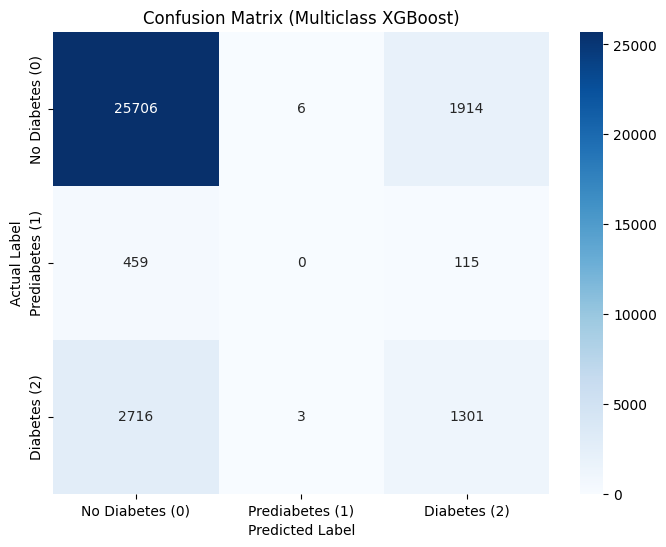

,Pred 0,Pred 1,Pred 2
Actual 0,25706,6,1914
Actual 1,459,0,115
Actual 2,2716,3,1301


In [ ]:
# ================================================
# CONFUSION MATRIX (MULTICLASS)
# ================================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"],
    yticklabels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"]
)

plt.title("Confusion Matrix (Multiclass XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ================================================
# SHOW CONFUSION MATRIX TABLE
# ================================================
cm_df = pd.DataFrame(
    cm,
    columns=["Pred 0", "Pred 1", "Pred 2"],
    index=["Actual 0", "Actual 1", "Actual 2"]
)

display(cm_df)

After testing XGBoost and LightGBM both with SMOTE, they are unable to predict class 1 (prediabetes). Hence SMOTE is not suitable for this dataset.

## Trying models using class weights for class imbalance

Try XGBoost with class weights

1. Hyperparameter tuning
2. Retrain with full dataset

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import get_scorer
from xgboost import XGBClassifier

# ==========================================================
# PARAMETER GRID FOR XGBOOST (CLASS WEIGHTS)
# ==========================================================
param_grid_xgb_weighted = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1.0]
}

print("Starting hyperparameter tuning for XGBoost (class weights)...")

best_params_xgb_weighted = None
best_score_xgb_weighted = -1

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scorer = get_scorer("recall_weighted")

# ==========================================================
# CUSTOM GRID SEARCH (NEEDED BECAUSE OF sample_weight)
# ==========================================================
for n_est in param_grid_xgb_weighted["n_estimators"]:
    for depth in param_grid_xgb_weighted["max_depth"]:
        for lr in param_grid_xgb_weighted["learning_rate"]:
            for subs in param_grid_xgb_weighted["subsample"]:

                scores = []

                for train_idx, val_idx in cv.split(X_train_small, y_train_small):

                    Xtr = X_train_small.iloc[train_idx]
                    Xval = X_train_small.iloc[val_idx]
                    ytr = y_train_small.iloc[train_idx]
                    yval = y_train_small.iloc[val_idx]

                    # Compute class weights → sample_weight
                    sample_w = compute_sample_weight("balanced", ytr)

                    # Build pipeline
                    pipeline = Pipeline([
                        ('preprocess', preprocessor),
                        ('model', XGBClassifier(
                            objective="multi:softprob",
                            num_class=3,
                            eval_metric="mlogloss",
                            random_state=RANDOM_STATE,
                            n_estimators=n_est,
                            max_depth=depth,
                            learning_rate=lr,
                            subsample=subs
                        ))
                    ])

                    # Train with sample weights
                    pipeline.fit(Xtr, ytr, model__sample_weight=sample_w)

                    # Evaluate
                    s = scorer(pipeline, Xval, yval)
                    scores.append(s)

                mean_score = np.mean(scores)

                # Track best
                if mean_score > best_score_xgb_weighted:
                    best_score_xgb_weighted = mean_score
                    best_params_xgb_weighted = {
                        "n_estimators": n_est,
                        "max_depth": depth,
                        "learning_rate": lr,
                        "subsample": subs
                    }

# ==========================================================
# SHOW BEST RESULTS
# ==========================================================
print("\nBest XGBoost Parameters (Class Weights):")
print(best_params_xgb_weighted)
print(f"Best Weighted recall Score: {best_score_xgb_weighted:.4f}")

best_params_xgb_weighted_df = pd.DataFrame([
    {"Parameter": k, "Value": str(v)}
    for k, v in best_params_xgb_weighted.items()
])
display(best_params_xgb_weighted_df)


Starting hyperparameter tuning for XGBoost (class weights)...

Best XGBoost Parameters (Class Weights):
{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'subsample': 0.8}
Best Weighted recall Score: 0.7615


,Parameter,Value
0,n_estimators,200
1,max_depth,7
2,learning_rate,0.1
3,subsample,0.8


In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# =====================================================
# 1) RETRAIN XGBoost WITH BEST HYPERPARAMETERS (CLASS WEIGHTS)
# =====================================================

best_params_xgb = best_params_xgb_weighted   # <-- from your tuning cell
print("\nApplying best XGBoost parameters:", best_params_xgb)

# Build XGBoost model with best hyperparameters
best_xgb_model = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=RANDOM_STATE,
    **best_params_xgb
)

# Build final pipeline
best_xgb_weighted_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', best_xgb_model)
])

print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Training XGBoost (Class Weights) on FULL dataset...")

# Compute sample weights for full training set
sample_w_full = compute_sample_weight("balanced", y_train)

# Train model with sample weights
best_xgb_weighted_pipeline.fit(X_train, y_train, classifier__sample_weight=sample_w_full)

# Predict on Test Set
y_pred_xgb_weighted = best_xgb_weighted_pipeline.predict(X_test)

# =====================================================
# 2) SHOW ACCURACY SCORE
# =====================================================
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_weighted)
print(f"\nXGBoost (Class Weights) Test Accuracy: {accuracy_xgb:.4f}\n")



Applying best XGBoost parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'subsample': 0.8}

X_train shape: (128880, 14)
y_train shape: (128880,)
Training XGBoost (Class Weights) on FULL dataset...

XGBoost (Class Weights) Test Accuracy: 0.6289



In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# =====================================================
# PERFORMANCE METRICS FOR XGBoost (CLASS WEIGHTS)
# =====================================================

print("\n================ Model Performance Metrics ================\n")

# Accuracy
accuracy_lgbm_weighted = accuracy_score(y_test, y_pred_xgb_weighted)
print(f"Accuracy: {accuracy_lgbm_weighted:.4f}")

# Weighted metrics (recommended for imbalance)
precision_w = precision_score(y_test, y_pred_xgb_weighted, average="weighted")
recall_w = recall_score(y_test, y_pred_xgb_weighted, average="weighted")
f1_w = f1_score(y_test, y_pred_xgb_weighted, average="weighted")

print(f"Weighted Precision: {precision_w:.4f}")
print(f"Weighted Recall:    {recall_w:.4f}")
print(f"Weighted F1 Score:  {f1_w:.4f}\n")

# Macro metrics (treat all classes equally)
precision_m = precision_score(y_test, y_pred_xgb_weighted, average="macro")
recall_m = recall_score(y_test, y_pred_xgb_weighted, average="macro")
f1_m = f1_score(y_test, y_pred_xgb_weighted, average="macro")

print(f"Macro Precision: {precision_m:.4f}")
print(f"Macro Recall:    {recall_m:.4f}")
print(f"Macro F1 Score:  {f1_m:.4f}\n")

# Classification report (per class view)
print("\n================ Classification Report ================\n")
print(classification_report(
    y_test, y_pred_xgb_weighted,
    target_names=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"]
))


================ Model Performance Metrics ================

Accuracy: 0.6289
Weighted Precision: 0.8474
Weighted Recall:    0.6289
Weighted F1 Score:  0.7041

Macro Precision: 0.4175
Macro Recall:    0.4870
Macro F1 Score:  0.3977


================ Classification Report ================

                 precision    recall  f1-score   support

No Diabetes (0)       0.95      0.64      0.76     27626
Prediabetes (1)       0.03      0.21      0.05       574
   Diabetes (2)       0.28      0.61      0.38      4020

       accuracy                           0.63     32220
      macro avg       0.42      0.49      0.40     32220
   weighted avg       0.85      0.63      0.70     32220



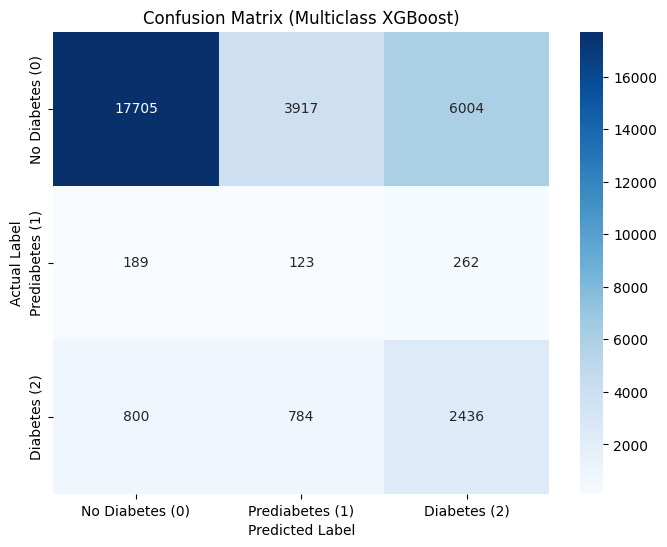

,Pred 0,Pred 1,Pred 2
Actual 0,17705,3917,6004
Actual 1,189,123,262
Actual 2,800,784,2436


In [ ]:
# ================================================
# CONFUSION MATRIX (MULTICLASS)
# ================================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb_weighted)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"],
    yticklabels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"]
)

plt.title("Confusion Matrix (Multiclass XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ================================================
# SHOW CONFUSION MATRIX TABLE
# ================================================
cm_df = pd.DataFrame(
    cm,
    columns=["Pred 0", "Pred 1", "Pred 2"],
    index=["Actual 0", "Actual 1", "Actual 2"]
)

display(cm_df)

Try LightGBM

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier

# =====================================================
# PARAMETER GRID FOR LIGHTGBM (CLASS WEIGHTS)
# =====================================================

param_grid_lgbm_weighted = {
    'classifier__num_leaves': [31, 60],
    'classifier__max_depth': [-1, 10],
    'classifier__learning_rate': [0.005, 0.01],
    'classifier__n_estimators': [300, 500],
    'classifier__min_child_samples': [20, 40],
}



# =====================================================
# LGBM PIPELINE (WITH BALANCED CLASS WEIGHTS)
# =====================================================
lgbm_weighted_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LGBMClassifier(
        objective='multiclass',
        num_class=3,
        class_weight='balanced',
        random_state=RANDOM_STATE
    ))
])

print("Performing hyperparameter tuning for LightGBM (Class Weights)...")

# =====================================================
# GRID SEARCH
# =====================================================
grid_search_lgbm_weighted = GridSearchCV(
    estimator=lgbm_weighted_pipeline,
    param_grid=param_grid_lgbm_weighted,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
    scoring='recall_weighted',
    n_jobs=-1,
    verbose=1
)

# Fit using the small training subset (faster)
grid_search_lgbm_weighted.fit(X_train_small, y_train_small)

# =====================================================
# DISPLAY BEST RESULTS
# =====================================================
best_params_lgbm_weighted = pd.DataFrame([
    {'Parameter': k.replace('classifier__', ''), 'Value': str(v)}
    for k, v in grid_search_lgbm_weighted.best_params_.items()
])

display(best_params_lgbm_weighted)
print("Best Weighted recall Score:", grid_search_lgbm_weighted.best_score_)


Performing hyperparameter tuning for LightGBM (Class Weights)...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


,Parameter,Value
0,learning_rate,0.01
1,max_depth,-1
2,min_child_samples,20
3,n_estimators,500
4,num_leaves,60


Best Weighted recall Score: 0.6979


In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns

# =====================================================
# 1) RETRAIN LightGBM WITH BEST HYPERPARAMETERS (CLASS WEIGHTS)
# =====================================================

best_params_lgbm_weighted = grid_search_lgbm_weighted.best_params_
print("\nApplying best LightGBM parameters:", best_params_lgbm_weighted)

# Build LightGBM model with best hyperparameters
best_lgbm_model = LGBMClassifier(
    objective="multiclass",
    num_class=3,
    class_weight="balanced",        # imbalance handled here
    random_state=RANDOM_STATE,
    **{k.replace("classifier__", ""): v for k, v in best_params_lgbm_weighted.items()}
)

# Build final pipeline
best_lgbm_weighted_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', best_lgbm_model)
])

print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Training LightGBM (Class Weights) on FULL dataset...")

# Train model (no sample_weight needed)
best_lgbm_weighted_pipeline.fit(X_train, y_train)

# Predict on Test Set
y_pred_lgbm_weighted = best_lgbm_weighted_pipeline.predict(X_test)

# =====================================================
# 2) SHOW ACCURACY SCORE
# =====================================================
accuracy_lgbm_weighted = accuracy_score(y_test, y_pred_lgbm_weighted)
print(f"\nLightGBM (Class Weights) Test Accuracy: {accuracy_lgbm_weighted:.4f}\n")



Applying best LightGBM parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': -1, 'classifier__min_child_samples': 20, 'classifier__n_estimators': 500, 'classifier__num_leaves': 60}

X_train shape: (128880, 14)
y_train shape: (128880,)
Training LightGBM (Class Weights) on FULL dataset...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 128880, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




LightGBM (Class Weights) Test Accuracy: 0.6054



In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# =====================================================
# PERFORMANCE METRICS FOR LIGHTGBM (CLASS WEIGHTS)
# =====================================================

print("\n================ Model Performance Metrics ================\n")

# Accuracy
accuracy_lgbm_weighted = accuracy_score(y_test, y_pred_lgbm_weighted)
print(f"Accuracy: {accuracy_lgbm_weighted:.4f}")

# Weighted metrics (recommended for imbalance)
precision_w = precision_score(y_test, y_pred_lgbm_weighted, average="weighted")
recall_w = recall_score(y_test, y_pred_lgbm_weighted, average="weighted")
f1_w = f1_score(y_test, y_pred_lgbm_weighted, average="weighted")

print(f"Weighted Precision: {precision_w:.4f}")
print(f"Weighted Recall:    {recall_w:.4f}")
print(f"Weighted F1 Score:  {f1_w:.4f}\n")

# Macro metrics (treat all classes equally)
precision_m = precision_score(y_test, y_pred_lgbm_weighted, average="macro")
recall_m = recall_score(y_test, y_pred_lgbm_weighted, average="macro")
f1_m = f1_score(y_test, y_pred_lgbm_weighted, average="macro")

print(f"Macro Precision: {precision_m:.4f}")
print(f"Macro Recall:    {recall_m:.4f}")
print(f"Macro F1 Score:  {f1_m:.4f}\n")

# Classification report (per class view)
print("\n================ Classification Report ================\n")
print(classification_report(
    y_test, y_pred_lgbm_weighted,
    target_names=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"]
))


================ Model Performance Metrics ================

Accuracy: 0.6054
Weighted Precision: 0.8535
Weighted Recall:    0.6054
Weighted F1 Score:  0.6893

Macro Precision: 0.4225
Macro Recall:    0.4970
Macro F1 Score:  0.3945


================ Classification Report ================

                 precision    recall  f1-score   support

No Diabetes (0)       0.95      0.61      0.75     27626
Prediabetes (1)       0.03      0.28      0.05       574
   Diabetes (2)       0.29      0.60      0.39      4020

       accuracy                           0.61     32220
      macro avg       0.42      0.50      0.39     32220
   weighted avg       0.85      0.61      0.69     32220



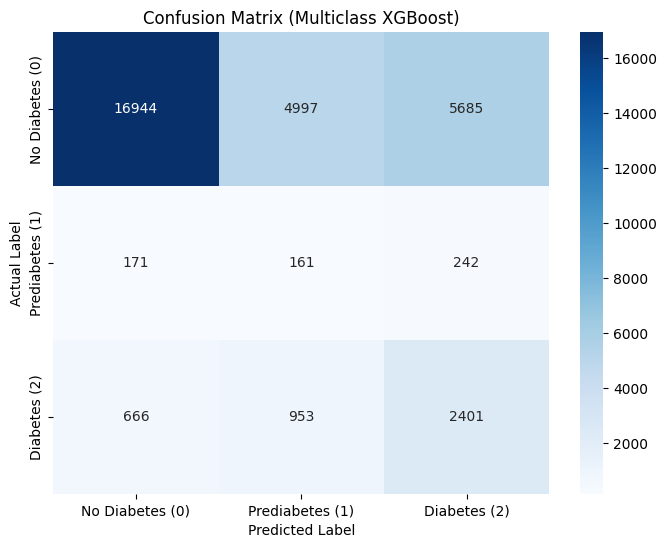

,Pred 0,Pred 1,Pred 2
Actual 0,16944,4997,5685
Actual 1,171,161,242
Actual 2,666,953,2401


In [ ]:
# ================================================
# CONFUSION MATRIX (MULTICLASS)
# ================================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm_weighted)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"],
    yticklabels=["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"]
)

plt.title("Confusion Matrix (Multiclass LGBM)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ================================================
# SHOW CONFUSION MATRIX TABLE
# ================================================
cm_df = pd.DataFrame(
    cm,
    columns=["Pred 0", "Pred 1", "Pred 2"],
    index=["Actual 0", "Actual 1", "Actual 2"]
)

display(cm_df)



and emsemble modelling


do SHAP



# Clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Path to dataset in Google Drive
data_path = "/content/drive/MyDrive/data mining cw dataset/CDC Diabetes Dataset.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (253680, 22)
Columns: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df.isnull().sum()


,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
# Remove Duplicates
initial_rows = len(df)
df = df.drop_duplicates()
print(f"\nRemoved {initial_rows - len(df)} duplicate rows. New row count: {len(df)}")


Removed 23899 duplicate rows. New row count: 229781


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  MentH

In [ ]:
# ===============================
# FEATURE ENGINEERING
# ===============================

# Make a copy to keep original data intact
df_fe = df.copy()


# # 1. Cardiovascular burden
# df_fe["CardioRisk"] = (
#     df["HighBP"] +
#     df["HighChol"] +
#     df["HeartDiseaseorAttack"] +
#     df["Stroke"]
# )

# # 2. Lifestyle risk
# df_fe["LifestyleRisk"] = (
#     df["Smoker"] +
#     df["HvyAlcoholConsump"] +
#     df["PhysActivity"]
# )

# # 3. Health burden
# df_fe["HealthBurden"] = df["MentHlth"] + df["PhysHlth"]



# # ===============================
# # DROP REDUNDANT ORIGINAL FEATURES
# # ===============================

df_fe = df_fe.drop(columns=[
    # 'Fruits', 'Veggies',
    # 'CholCheck',
    # 'AnyHealthcare',
    'Education',
    # 'NoDocbcCost',
    'Age',
    'Sex',
    # 'DiffWalk',
    'Income',
    # 'HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke',
    # 'Smoker',
    # 'HvyAlcoholConsump','PhysActivity',
    # 'MentHlth', 'PhysHlth',

])

# Quick check
print("Final feature set for clustering:")
print(df_fe.columns)
print("\nShape:", df_fe.shape)

df_fe


Final feature set for clustering:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk'],
      dtype='object')

Shape: (229781, 18)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd



# Separate features and label (label NOT used in clustering)
X = df_fe.drop(columns=["Diabetes_012"])
y = df_fe["Diabetes_012"]

# -------------------------
# Spearman correlation filter
# -------------------------
corr_thresh = 0.85  # common + defensible threshold

# Compute absolute Spearman correlation
corr = X.corr(method="spearman").abs()

# Upper triangle mask (to avoid duplicate pairs)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Identify features to drop
to_drop_corr = [col for col in upper.columns if (upper[col] > corr_thresh).any()]

# Drop correlated features
X_filtered = X.drop(columns=to_drop_corr)

print("Dropped due to high correlation:", to_drop_corr)
print("Remaining features:", X_filtered.columns.tolist())
print("Final shape:", X_filtered.shape)


log_features = ["PhysHlth","MenHlth"]  # adjust if needed
log_features = [c for c in log_features if c in X_filtered.columns]
passthrough_features = [c for c in X_filtered.columns if c not in log_features]


log1p = FunctionTransformer(
    lambda x: np.log1p(np.clip(x, 0, None)),
    feature_names_out="one-to-one"
)

preprocess = ColumnTransformer(
    transformers=[
        (
            "log_block",
            Pipeline([
                ("log", log1p),
                ("scale", RobustScaler())
            ]),
            log_features,
        ),
        (
            "scale_block",
            RobustScaler(),
            passthrough_features,
        ),
    ],
    remainder="drop",
)

# ===============================
# Apply preprocessing
# ===============================

X_scaled = preprocess.fit_transform(X_filtered)

# Convert back to DataFrame
feature_names = preprocess.get_feature_names_out()
X_scaled = pd.DataFrame(X_scaled, columns=feature_names, index=X_filtered.index)

print("Final scaled shape:", X_scaled.shape)


# # Copy to avoid modifying original data
# X_scaled = X_filtered.copy()

# scaler = RobustScaler()

# # Scale all features
# X_scaled = pd.DataFrame(
#     scaler.fit_transform(X),
#     columns=X.columns,
#     index=X.index
# )

# # Sanity checks
# print("X shape:", X.shape)
# print("X_scaled shape:", X_scaled.shape)


Dropped due to high correlation: []
Remaining features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']
Final shape: (229781, 17)
Final scaled shape: (229781, 17)


## K-Means

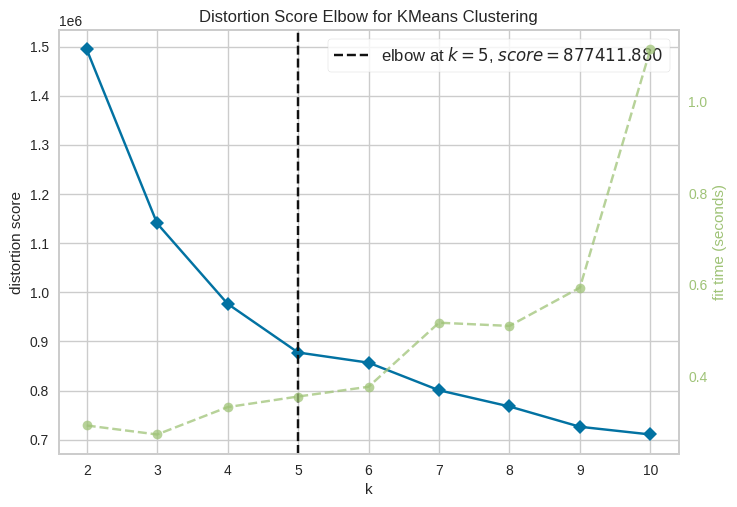

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import numpy as np

RANDOM_STATE = 42  # set for reproducibility
np.random.seed(RANDOM_STATE)
sample_idx = np.random.choice(len(X_scaled), size=5000, replace=False)
X_sample = X_scaled.iloc[sample_idx]

# ----------------------------------
# Elbow Method to find optimal K
# ----------------------------------
kmeans_model = KMeans(
    random_state=RANDOM_STATE,
    n_init="auto"
)

elbow_visualizer = KElbowVisualizer(
    kmeans_model,
    k=(2, 11),              # try K from 2 to 10
    metric="distortion"
)

elbow_visualizer.fit(X_scaled)
elbow_visualizer.show()
plt.show()


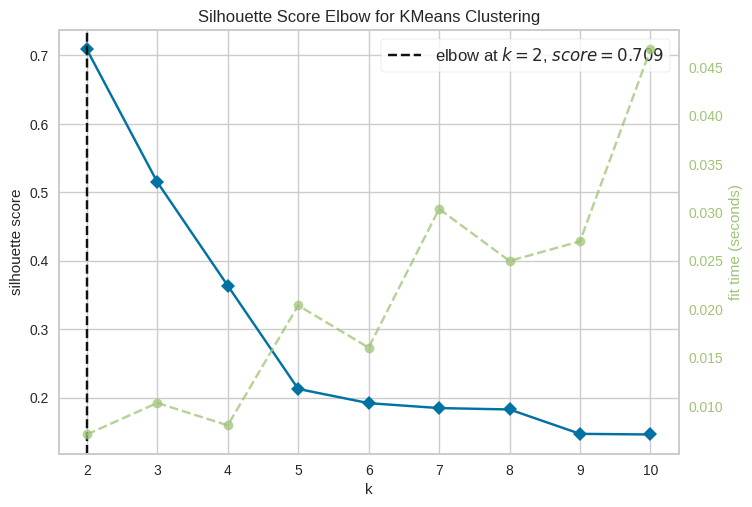

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import numpy as np

RANDOM_STATE = 42  # ensure reproducibility
np.random.seed(RANDOM_STATE)
sample_idx = np.random.choice(len(X_scaled), size=5000, replace=False)
X_sample = X_scaled.iloc[sample_idx]

# ----------------------------------
# Silhouette Score to find optimal K
# ----------------------------------
kmeans_model = KMeans(
    random_state=RANDOM_STATE,
    n_init="auto"
)

silhouette_visualizer = KElbowVisualizer(
    kmeans_model,
    k=(2, 11),              # K from 2 to 10
    metric="silhouette"
)

silhouette_visualizer.fit(X_sample)
silhouette_visualizer.show()
plt.show()


## Applying K-means with 5 clusters

Optimal number of clusters (K) chosen: 5


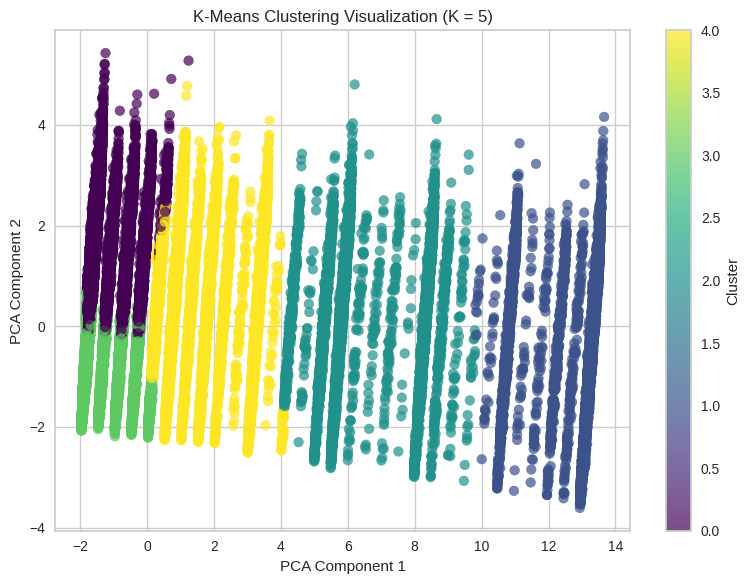

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_STATE = 42
optimal_k = 5

print(f"Optimal number of clusters (K) chosen: {optimal_k}")

# ----------------------------------
# Fit K-Means
# ----------------------------------
kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=RANDOM_STATE,
    n_init="auto"
)

cluster_labels = kmeans.fit_predict(X_scaled)

# ----------------------------------
# Create clustered DataFrame
# ----------------------------------
FEATURE_COLS = X.columns  # feature names after feature engineering

kmeans_clustered = pd.DataFrame(
    X_scaled,
    columns=FEATURE_COLS,
    index=df_fe.index
)

kmeans_clustered["Cluster"] = cluster_labels
kmeans_clustered["Diabetes_012"] = y.values  # add label ONLY for analysis

# ----------------------------------
# PCA for 2D visualisation
# ----------------------------------
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

# ----------------------------------
# Plot clusters in PCA space
# ----------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap="viridis",
    alpha=0.7
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering Visualization (K = {optimal_k})")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()


In [ ]:
# ===============================
# CLUSTER SIZE ANALYSIS
# ===============================

# Count number of points in each cluster
cluster_sizes = kmeans_clustered["Cluster"].value_counts().sort_index()

# Proportion of each cluster
cluster_proportions = kmeans_clustered["Cluster"].value_counts(normalize=True).sort_index()

# Display results
cluster_summary = pd.DataFrame({
    "Count": cluster_sizes,
    "Proportion": cluster_proportions
})

print(cluster_summary)


         Count  Proportion
Cluster                   
0        84676    0.368507
1        13925    0.060601
2        11003    0.047885
3        97099    0.422572
4        23078    0.100435


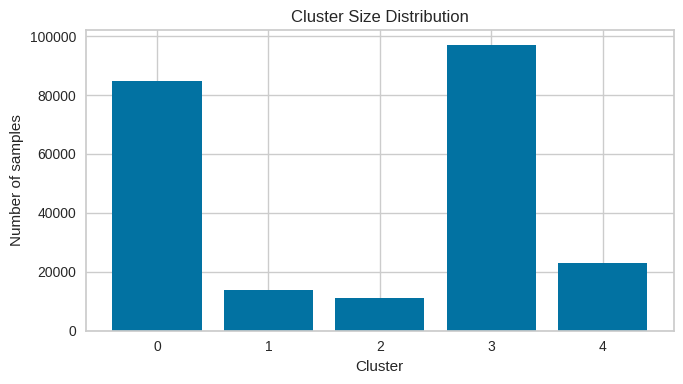

In [ ]:
plt.figure(figsize=(7, 4))
plt.bar(cluster_sizes.index, cluster_sizes.values)

plt.xlabel("Cluster")
plt.ylabel("Number of samples")
plt.title("Cluster Size Distribution")

plt.xticks(cluster_sizes.index)
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(
    kmeans_clustered["Cluster"],
    kmeans_clustered["Diabetes_012"],
    normalize="index"
)


Diabetes_012,0.0,1.0,2.0
Cluster,,,
0,0.737529,0.025190,0.237281
1,0.743770,0.029443,0.226786
2,0.787331,0.024630,0.188040
3,0.920411,0.013533,0.066056
4,0.832524,0.021709,0.145767


## Silhouette Score Analysis for K-Means

20 mins

Average Silhouette Score for k=5: 0.2085


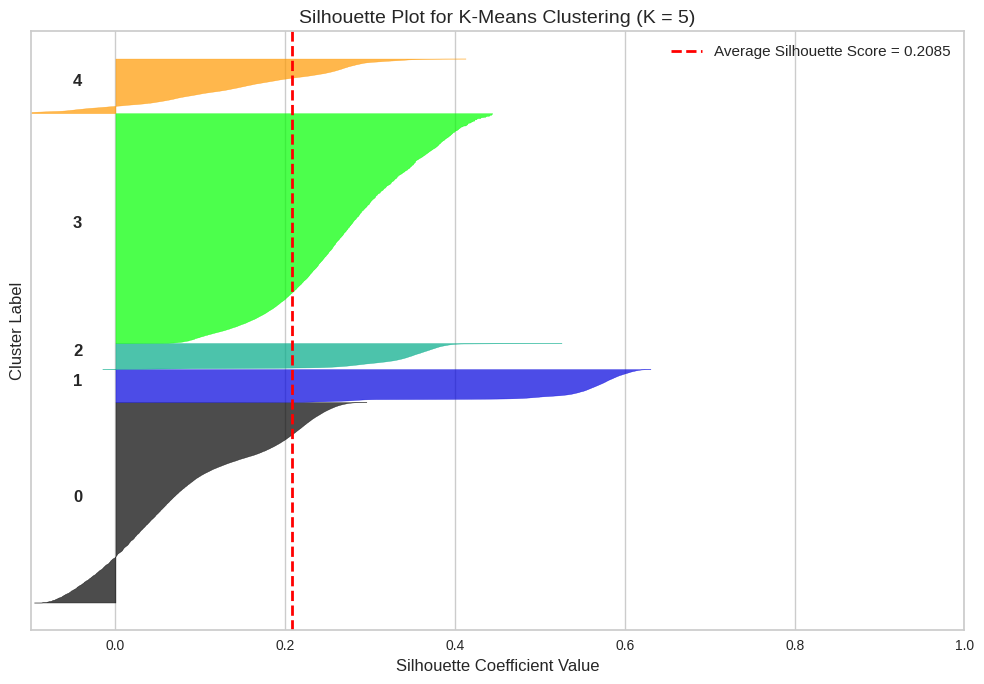

In [ ]:
# ===============================
# SILHOUETTE ANALYSIS
# ===============================

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

# Calculate average silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Average Silhouette Score for k={optimal_k}: {silhouette_avg:.4f}")

# Calculate silhouette values for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create silhouette plot
fig, ax = plt.subplots(figsize=(10, 7))

y_lower = 10
for i in range(optimal_k):
    # Silhouette values for cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # Cluster label
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),
            fontsize=12, fontweight="bold")

    y_lower = y_upper + 10  # space between clusters

# Plot formatting
ax.set_title(f"Silhouette Plot for K-Means Clustering (K = {optimal_k})", fontsize=14)
ax.set_xlabel("Silhouette Coefficient Value", fontsize=12)
ax.set_ylabel("Cluster Label", fontsize=12)

# Average silhouette line
ax.axvline(
    x=silhouette_avg,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Average Silhouette Score = {silhouette_avg:.4f}"
)

ax.legend(loc="best", fontsize=11)
ax.set_yticks([])
ax.set_xlim([-0.1, 1])

plt.tight_layout()
plt.show()


## DBSCAN

In [ ]:


from sklearn.decomposition import PCA
import numpy as np

RANDOM_STATE = 42

# PCA with 90% variance retention
pca = PCA(n_components=0.90, random_state=RANDOM_STATE)

X_pca_full = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("PCA shape:", X_pca_full.shape)
print("Explained variance ratio:", np.round(pca.explained_variance_ratio_, 4))
print("Total explained variance:", round(pca.explained_variance_ratio_.sum(), 4))



Original shape: (229781, 17)
PCA shape: (229781, 4)
Explained variance ratio: [0.787  0.0703 0.0347 0.018 ]
Total explained variance: 0.91


In [ ]:
# -------------------------------
# Sampling for DBSCAN tuning
# -------------------------------
SAMPLE_SIZE = 20000   # adjust depending on dataset size

np.random.seed(RANDOM_STATE)

sample_idx = np.random.choice(
    X_pca_full.shape[0],
    size=min(SAMPLE_SIZE, X_pca_full.shape[0]),
    replace=False
)

X_pca_sample = X_pca_full[sample_idx]

print("Full PCA shape:", X_pca_full.shape)
print("Sample PCA shape:", X_pca_sample.shape)


Full PCA shape: (229781, 4)
Sample PCA shape: (20000, 4)


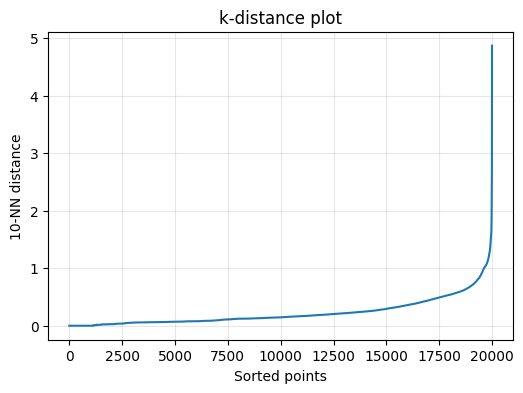

eps range: 0.5377 to 0.6895
eps_list: [0.5377 0.5681 0.5984 0.6288 0.6591 0.6895]


In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

k_ref = 10

nn = NearestNeighbors(n_neighbors=k_ref)
nn.fit(X_pca_sample)

distances, _ = nn.kneighbors(X_pca_sample)
k_dist = np.sort(distances[:, -1])

# Plot
plt.figure(figsize=(6,4))
plt.plot(k_dist)
plt.title("k-distance plot")
plt.xlabel("Sorted points")
plt.ylabel(f"{k_ref}-NN distance")
plt.grid(alpha=0.3)
plt.show()

# Define eps range around 90–95 percentile
eps_low, eps_high = np.quantile(k_dist, [0.90, 0.95])
eps_list = np.linspace(eps_low, eps_high, 6)

print("eps range:", round(eps_low,4), "to", round(eps_high,4))
print("eps_list:", np.round(eps_list,4))


In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd

min_samples_list = [8, 10, 12, 15, 20, 25]

records = []

for ms in min_samples_list:
    for eps in eps_list:
        db = DBSCAN(
            eps=float(eps),
            min_samples=int(ms),
            n_jobs=-1
        )

        labels = db.fit_predict(X_pca_sample)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = np.mean(labels == -1)

        records.append({
            "min_samples": ms,
            "eps": float(eps),
            "n_clusters": n_clusters,
            "noise_ratio": noise_ratio
        })

results_df = pd.DataFrame(records)

results_df.sort_values(
    ["n_clusters", "noise_ratio"]
).head(10)


,min_samples,eps,n_clusters,noise_ratio
22,15,0.659149,4,0.04055
23,15,0.689515,5,0.03530
21,15,0.628782,5,0.04730
34,25,0.659149,5,0.06950
16,12,0.659149,6,0.03290
15,12,0.628782,6,0.03895
29,20,0.689515,6,0.04465
14,12,0.598416,6,0.04600
35,25,0.689515,6,0.05735
17,12,0.689515,7,0.02950


In [ ]:
best_eps = 0.66
best_min_samples = 15

db_final = DBSCAN(
    eps=best_eps,
    min_samples=best_min_samples,
    n_jobs=-1
)

labels_full = db_final.fit_predict(X_pca_sample)

n_clusters = len(set(labels_full)) - (1 if -1 in labels_full else 0)
noise_ratio = np.mean(labels_full == -1)

print("FINAL RESULTS")
print("Clusters:", n_clusters)
print("Noise ratio:", round(noise_ratio,3))


FINAL RESULTS
Clusters: 4
Noise ratio: 0.04


In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D ONLY for visualisation
pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X_pca_sample)

print("Visualisation shape:", X_vis.shape)


Visualisation shape: (20000, 2)


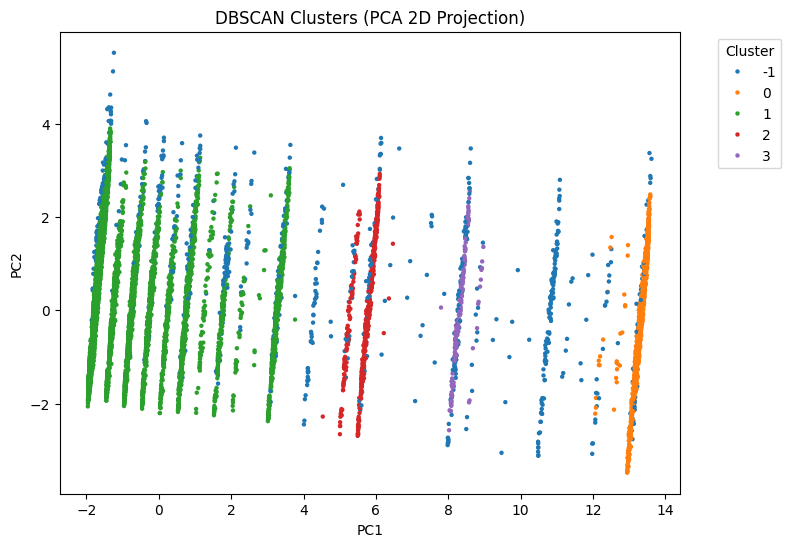

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    x=X_vis[:,0],
    y=X_vis[:,1],
    hue=labels_full,
    palette="tab10",
    s=10,
    linewidth=0
)

plt.title("DBSCAN Clusters (PCA 2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1))
plt.show()


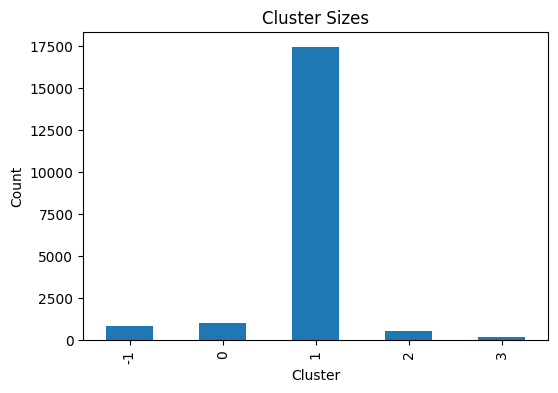

-1      809
 0     1036
 1    17452
 2      508
 3      195
Name: count, dtype: int64


In [ ]:
import pandas as pd

cluster_counts = pd.Series(labels_full).value_counts().sort_index()

plt.figure(figsize=(6,4))
cluster_counts.plot(kind="bar")
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

print(cluster_counts)
